In [23]:
%reload_ext autoreload
%autoreload 2

import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from lib import utils


plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['font.size'] = 16

In [24]:
%run -i lib\load_data

Meta data is created.
Main data is loaded successfully.


In [26]:
%run -i lib\cluster_analysis

Number of participants who fail consistency check: 36
Worker IDs to be excluded: [434924, 434925, 434938, 434939, 434948, 434951, 434956, 434965, 434970, 434973, 434975, 434987, 434991, 435006, 435007, 435012, 435014, 435023, 435025, 435034, 435037, 435044, 435050, 435051, 435061, 435071, 435078, 435082, 435085, 435088, 435091, 435094, 435102, 435109, 435125, 435126]
Consistency check finished.
Number of subjects in each cluster:
K-means [104  57]
GMM [99 62]


In [27]:
df = pd.read_csv('valid_sequence_data.csv',index_col=0)

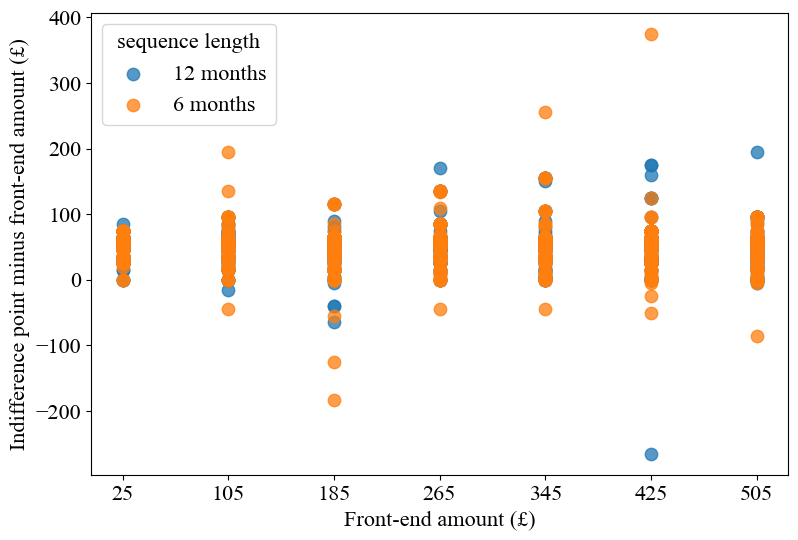

In [28]:
# Plot: check outliers
df_plot = df.groupby(['seq_length','front_amount'])['indiff_point'].mean().to_frame().reset_index()
seq_length_list = df_plot['seq_length'].unique()
front_amount_list = df_plot['front_amount'].unique()

plt.figure(figsize=(9, 6))
for t in seq_length_list:
    tab_plot = df[df['seq_length'] == t]
    plt.scatter(tab_plot['front_amount'],tab_plot['value_surplus'],label=t,alpha=0.75,s=80)

# Add title and labels
plt.xlabel('Front-end amount (£)')
plt.ylabel('Indifference point minus front-end amount (£)')
plt.xticks(front_amount_list)
plt.legend(loc=2,title='sequence length')
plt.show()

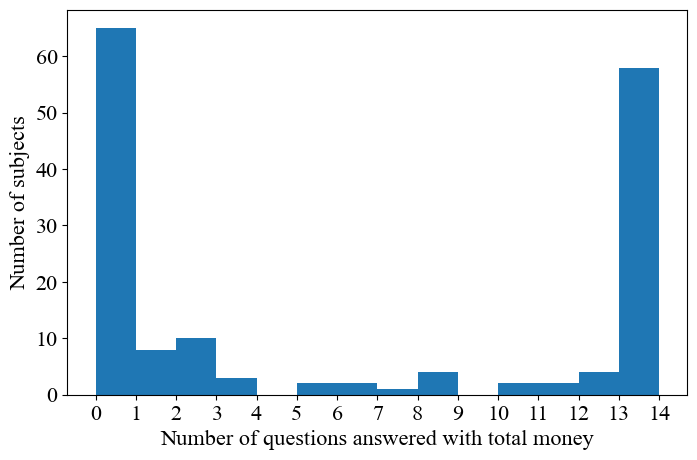

In [32]:
df['total_money_heuristic'] = df['value_surplus'] == 60
plt.figure(figsize=(8,5))
plt.hist(df.groupby('worker_id')['total_money_heuristic'].sum(),bins=14)
plt.xticks(np.arange(15))
plt.ylabel('Number of subjects')
plt.xlabel('Number of questions answered with total money')
plt.show()

Text(0.5, 0, 'front-end amount (£)')

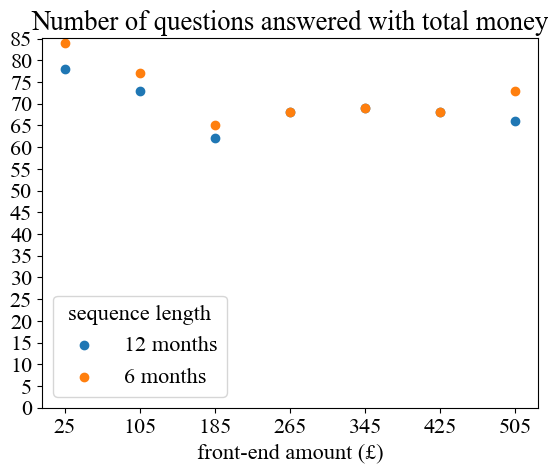

In [31]:
df_plot = df.groupby(['seq_length','front_amount'])['total_money_heuristic'].sum().to_frame().reset_index()
front_amount_list = df_plot['front_amount'].unique()

for t in seq_length_list:
    tab_plot = df_plot[df_plot['seq_length'] == t]
    plt.scatter(tab_plot['front_amount'],tab_plot['total_money_heuristic'],label=t)

plt.title('Number of questions answered with total money')
plt.legend(loc='best',title='sequence length')
plt.xticks(front_amount_list)
plt.yticks(np.arange(0,90,step=5))
plt.xlabel('front-end amount (£)')

Text(0.5, 0, 'front-end amount (£)')

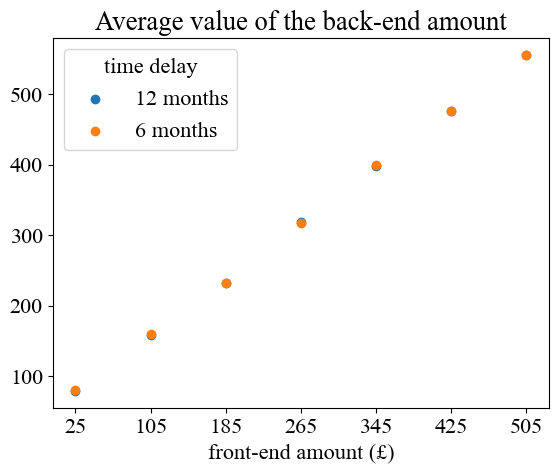

In [33]:
df_plot = df.groupby(['seq_length','front_amount'])['indiff_point'].mean().to_frame().reset_index()
front_amount_list = df_plot['front_amount'].unique()

for t in seq_length_list:
    tab_plot = df_plot[df_plot['seq_length'] == t]
    plt.scatter(tab_plot['front_amount'],tab_plot['indiff_point'],label=t)

plt.title('Average value of the back-end amount')
plt.legend(loc='best',title='time delay')
plt.xticks(front_amount_list)
plt.xlabel('front-end amount (£)')

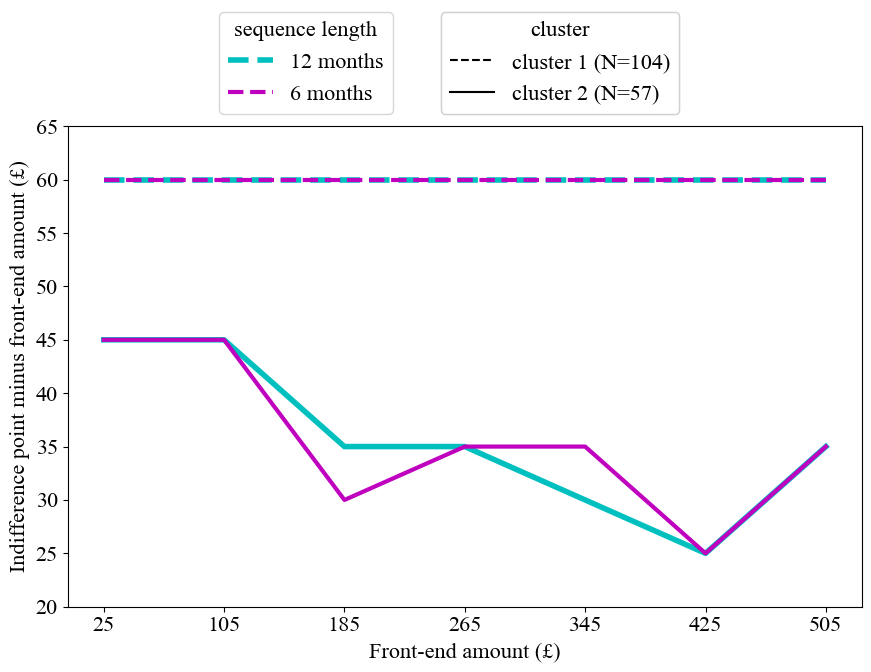

In [35]:
utils.median_plot(df,label_name='label_kmeans')

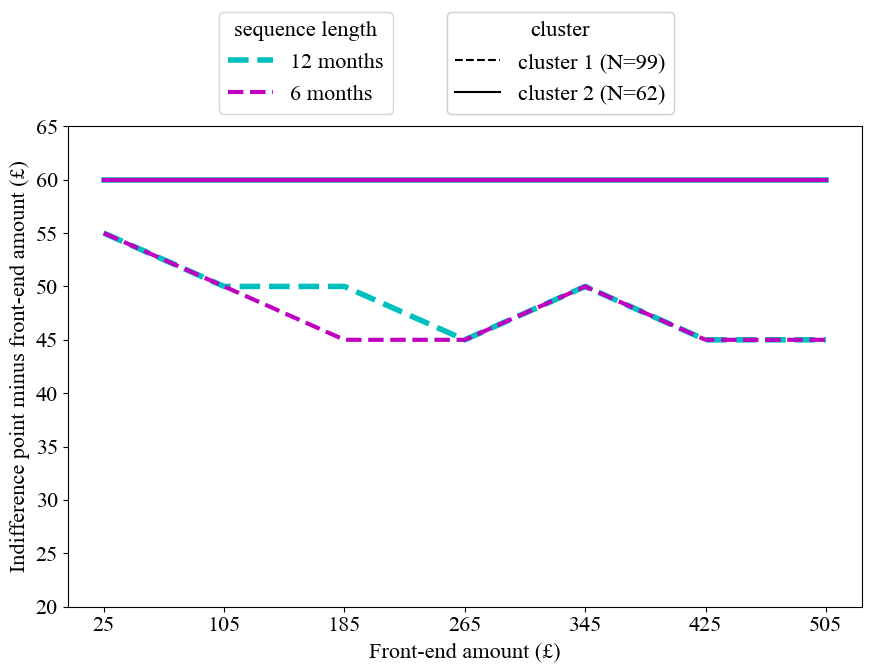

In [36]:
utils.median_plot(df,label_name='label_gmm')

In [37]:
print('Mean response time, split by whether using total money heuristic')
print(df.groupby('total_money_heuristic')['response_time_enter'].mean())
print(stats.ttest_ind(df['response_time_enter'][df['total_money_heuristic'] == 0],
                df['response_time_enter'][df['total_money_heuristic'] == 1]))
print('')
print('Ratio of answers using total money heuristic, split by k-means clustered label')
print(df.groupby('label_kmeans')['total_money_heuristic'].mean())
print(stats.ttest_ind(df['total_money_heuristic'][df['label_kmeans'] == 0],
                df['total_money_heuristic'][df['label_kmeans'] == 1]))
print('')
print('Ratio of answers using total money heuristic, split by GMM clustered label')
print(df.groupby('label_gmm')['total_money_heuristic'].mean())
print(stats.ttest_ind(df['total_money_heuristic'][df['label_gmm'] == 0],
                df['total_money_heuristic'][df['label_gmm'] == 1]))
print('')
print('mean response time, split by GMM clustered label')
print(df.groupby('label_gmm')['response_time_enter'].mean())
print(stats.ttest_ind(df['response_time_enter'][df['label_gmm'] == 0],
                df['response_time_enter'][df['label_gmm'] == 1]))

Mean response time, split by whether using total money heuristic
total_money_heuristic
False    10881.589258
True      9283.758097
Name: response_time_enter, dtype: float64
TtestResult(statistic=4.1769308765333175, pvalue=3.067287756424532e-05, df=2252.0)

Ratio of answers using total money heuristic, split by k-means clustered label
label_kmeans
0    0.631181
1    0.086466
Name: total_money_heuristic, dtype: float64
TtestResult(statistic=29.272349061422467, pvalue=6.704994982502427e-160, df=2252.0)

Ratio of answers using total money heuristic, split by GMM clustered label
label_gmm
0    0.190476
1    0.834101
Name: total_money_heuristic, dtype: float64
TtestResult(statistic=-38.62090047518177, pvalue=7.881981399504056e-251, df=2252.0)

mean response time, split by GMM clustered label
label_gmm
0    10489.113276
1     9689.555300
Name: response_time_enter, dtype: float64
TtestResult(statistic=2.043850524921045, pvalue=0.041084429941772714, df=2252.0)


In [38]:
# Spearman rank-order correlation
# the entire sample
print(stats.spearmanr(df['value_surplus'],df['front_amount']))

# cluster 1
print(stats.spearmanr(df[df['label_gmm'] == 0]['value_surplus'],
                df[df['label_gmm'] == 0]['front_amount']))

# cluster 2
print(stats.spearmanr(df[df['label_gmm'] == 1]['value_surplus'],
                    df[df['label_gmm'] == 1]['front_amount']))

SignificanceResult(statistic=-0.04871921859566945, pvalue=0.020717183445793052)
SignificanceResult(statistic=-0.10585631447939056, pvalue=7.865243915346735e-05)
SignificanceResult(statistic=0.017564898214393918, pvalue=0.6053039131541476)


In [18]:
df['front_amount_6m'] = df['front_amount'] * (df['seq_length'] == '6 months')
df['front_amount_12m'] = df['front_amount'] * (df['seq_length'] == '12 months')
df['front_amount_6m_0'] = df['front_amount_6m']  * (df['label_gmm'] == 0)
df['front_amount_6m_1'] = df['front_amount_6m']  * (df['label_gmm'] == 1)
df['front_amount_12m_0'] = df['front_amount_12m']  * (df['label_gmm'] == 0)
df['front_amount_12m_1'] = df['front_amount_12m']  * (df['label_gmm'] == 1)


df_dummy = pd.concat([df,pd.get_dummies(df['worker_id'], prefix='worker_id')],axis=1)
df_filtered = utils.rule_out_outlier(df_dummy,col_name='value_surplus')

reg_cols_baseline = ['front_amount_6m','front_amount_12m','choice_peli']
reg_cols_label = ['front_amount_6m_0','front_amount_12m_0','front_amount_6m_1','front_amount_12m_1','choice_peli']
reg_cols_dummy = reg_cols_baseline + [col for col in df_dummy.columns if col.startswith('worker_id_')]
reg_cols_dummy_2 = reg_cols_label + [col for col in df_dummy.columns if col.startswith('worker_id_')]

Number of outliers (lower and upper): [5, 7]


In [4]:
y = df['value_surplus']
X = sm.add_constant(df[reg_cols_baseline]).astype(float)
model_rlm_pool_1 = sm.RLM(endog=y,exog=X,M=sm.robust.norms.HuberT()).fit(maxiter=200,scale_est=sm.robust.scale.HuberScale())
model_rlm_pool_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Robust linear Model Regression Results                                            
==============================================================================================================================
Dep. Variable:                                                          value_surplus   No. Observations:                 2198
Model:                                                                            RLM   Df Residuals:                     2194
Method:                                                                          IRLS   Df Model:                            3
Norm:                                                                          HuberT                                         
Scale Est.:        <statsmodels.robust.scale.HuberScale object at 0x00000182BD1A4B50>                                         
Cov Type:                                                                          H1                                         
Date:                                                                Tue, 06 Feb 2024                                         
Time:                                                                        01:37:10                                         
No. Iterations:                                                                    12                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               55.0002      0.963     57.084      0.000      53.112      56.889
front_amount_6m     -0.0048      0.003     -1.920      0.055      -0.010       0.000
front_amount_12m    -0.0060      0.003     -2.397      0.017      -0.011      -0.001
choice_peli         -0.8484      0.861     -0.985      0.324      -2.536       0.839
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [5]:
y = df['value_surplus']
X = sm.add_constant(df[reg_cols_label]).astype(float)
model_rlm_pool_2 = sm.RLM(endog=y,exog=X,M=sm.robust.norms.HuberT()).fit(maxiter=200,scale_est=sm.robust.scale.HuberScale())
model_rlm_pool_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Robust linear Model Regression Results                                            
==============================================================================================================================
Dep. Variable:                                                          value_surplus   No. Observations:                 2198
Model:                                                                            RLM   Df Residuals:                     2192
Method:                                                                          IRLS   Df Model:                            5
Norm:                                                                          HuberT                                         
Scale Est.:        <statsmodels.robust.scale.HuberScale object at 0x00000182BD1A72E0>                                         
Cov Type:                                                                          H1                                         
Date:                                                                Tue, 06 Feb 2024                                         
Time:                                                                        01:37:17                                         
No. Iterations:                                                                    13                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 53.9216      0.865     62.339      0.000      52.226      55.617
front_amount_6m_0     -0.0253      0.003     -9.915      0.000      -0.030      -0.020
front_amount_12m_0    -0.0281      0.003    -11.022      0.000      -0.033      -0.023
front_amount_6m_1      0.0211      0.003      7.257      0.000       0.015       0.027
front_amount_12m_1     0.0212      0.003      7.322      0.000       0.016       0.027
choice_peli            0.8913      0.774      1.151      0.250      -0.627       2.409
======================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [6]:
y = df_dummy['value_surplus']
X = sm.add_constant(df_dummy[reg_cols_dummy]).astype(float)
model_rlm_fe = sm.RLM(endog=y,exog=X,M=sm.robust.norms.HuberT()).fit(maxiter=200,scale_est=sm.robust.scale.HuberScale())

pd.concat([model_rlm_fe.params[reg_cols_baseline].rename('coef'),
           model_rlm_fe.pvalues[reg_cols_baseline].rename('pvalues'),
           model_rlm_fe.conf_int().loc[reg_cols_baseline].rename(columns={0:'ci_lower',1:'ci_upper'})],
           axis=1)

,coef,pvalues,ci_lower,ci_upper
front_amount_6m,-0.004768,1.405737e-06,-0.006705,-0.002831
front_amount_12m,-0.006412,8.714686e-11,-0.008349,-0.004475
choice_peli,2.181327,7.852493e-12,1.556390,2.806263


In [7]:
y = df_dummy['value_surplus']
X = sm.add_constant(df_dummy[reg_cols_dummy_2]).astype(float)
model_rlm_fe_2 = sm.RLM(endog=y,exog=X,M=sm.robust.norms.HuberT()).fit(maxiter=200,scale_est=sm.robust.scale.HuberScale())

pd.concat([model_rlm_fe_2.params[reg_cols_label].rename('coef'),
           model_rlm_fe_2.pvalues[reg_cols_label].rename('pvalues'),
           model_rlm_fe_2.conf_int().loc[reg_cols_label].rename(columns={0:'ci_lower',1:'ci_upper'})],
           axis=1)

,coef,pvalues,ci_lower,ci_upper
front_amount_6m_0,-0.009692,1.009615e-14,-0.012147,-0.007237
front_amount_12m_0,-0.012670,4.713376e-24,-0.015125,-0.010215
front_amount_6m_1,0.001801,2.453842e-01,-0.001238,0.004840
front_amount_12m_1,0.001906,2.190217e-01,-0.001133,0.004945
choice_peli,2.583942,5.019028e-16,1.959554,3.208329


NormaltestResult(statistic=1410.0188434066422, pvalue=6.581099613250527e-307)


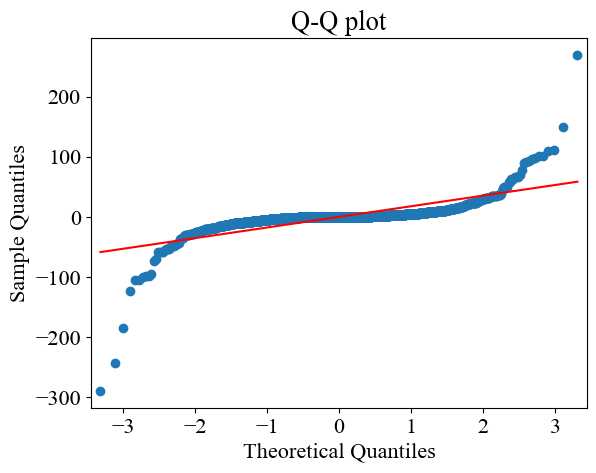

In [17]:
pplot = sm.ProbPlot(model_rlm_fe_2.resid)
fig = pplot.qqplot(line='s')
plt.title('Q-Q plot')
print(stats.normaltest(model_rlm_fe_2.resid))

In [18]:
model_bootstrap = utils.bootstrap_model(df,model=model_rlm_pool_1,param_names=reg_cols_baseline,n_bootstrap=1000)
model_bootstrap.bootstrap()
with open('bootstrap_rlm_pool_baseline.pkl', 'wb') as file:
    pickle.dump(model_bootstrap, file)

100%|██████████| 1000/1000 [00:28<00:00, 34.57it/s]


In [19]:
model_bootstrap = utils.bootstrap_model(df,model=model_rlm_pool_2,param_names=reg_cols_label,n_bootstrap=1000)
model_bootstrap.bootstrap()
with open('bootstrap_rlm_pool_label.pkl', 'wb') as file:
    pickle.dump(model_bootstrap, file)

100%|██████████| 1000/1000 [00:34<00:00, 28.77it/s]


In [20]:
model_bootstrap = utils.bootstrap_model(df,model=model_rlm_fe,param_names=reg_cols_baseline,n_bootstrap=1000,fe=True)
model_bootstrap.bootstrap()
with open('bootstrap_rlm_fe_baseline.pkl', 'wb') as file:
    pickle.dump(model_bootstrap, file)

100%|██████████| 1000/1000 [31:52<00:00,  1.91s/it]


In [21]:
model_bootstrap = utils.bootstrap_model(df,model=model_rlm_fe_2,param_names=reg_cols_label,n_bootstrap=1000,fe=True)
model_bootstrap.bootstrap()
with open('bootstrap_rlm_fe_label.pkl', 'wb') as file:
    pickle.dump(model_bootstrap, file)

100%|██████████| 1000/1000 [30:16<00:00,  1.82s/it] 


In [11]:
# save regression results
model_results = {
                 'rlm_pool_baseline':utils.get_reg_result(model_rlm_pool_1,reg_cols_baseline),
                 'rlm_pool_label':utils.get_reg_result(model_rlm_pool_2,reg_cols_label),
                 'rlm_fe_baseline':utils.get_reg_result(model_rlm_fe,reg_cols_baseline),
                 'rlm_fe_label':utils.get_reg_result(model_rlm_fe_2,reg_cols_label)
                 }

with open('model_reg_result_gm.json', "w") as f:
    json.dump(model_results, f)